Vecinos próximos para regresión
===

* *15 min* | Ultima modificación: Junio 22, 2019

Este ejemplo está basado en https://scikit-learn.org/stable/auto_examples/neighbors/plot_regression.html#sphx-glr-auto-examples-neighbors-plot-regression-py

## Descripción del problema

Se desea construir un modelo de regresión para el siguiente conjunto artificial de datos, los cuales exhiben un comportamiento no lineal.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
%load_ext rpy2.ipython

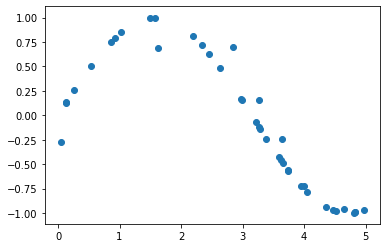

In [2]:
np.random.seed(12345)
X = np.sort(5 * np.random.rand(40, 1), axis=0)
y = np.sin(X).ravel()
y[::5] += 1 * (0.5 - np.random.rand(8))
plt.scatter(X, y);

## Solución

En este caso, el método pronóstica mediante la interpolación de los valores $y$ de los puntos que conforman el vecindario. El parámetro `weight` toma los siguientes valores:
 
  * `uniform`:  todos los pesos en el vecindario tienen el mismo peso.
  * `distance`: cada punto tiene un peso inversamente proporcional con la distancia al punto calculado.

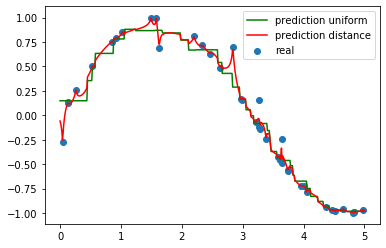

In [8]:
from sklearn.neighbors import KNeighborsRegressor
T = np.linspace(0, 5, 500)[:, np.newaxis]


knn_uniform = KNeighborsRegressor(
    n_neighbors = 5, 
    weights='uniform')

y_uniform = knn_uniform.fit(X, y).predict(T)

knn_distance = KNeighborsRegressor(
    n_neighbors = 5, 
    weights='distance')

y_distance= knn_distance.fit(X, y).predict(T)

plt.scatter(X, y, label='real');
plt.plot(T, y_uniform,  c='g', label='uniform')
plt.plot(T, y_distance, c='r', label='distance')
plt.legend();

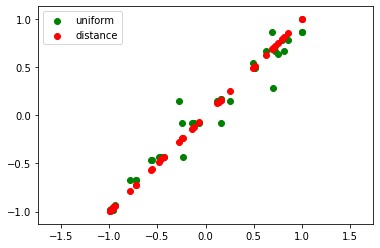

In [20]:
plt.scatter(y, knn_uniform.fit(X, y).predict(X),  c='g', label='uniform')
plt.scatter(y, knn_distance.fit(X, y).predict(X), c='r', label='distance')
plt.axis('equal')
plt.legend();